# EDA - Shopping data at the supermarket

## Table of Contents

1. [Introduction](#Introduction)
2. [Importing necessary libraries](#importing-necessary-libraries)
3. [Loading dataset](#loading-dataset)
4. [Data Visualization](#data-visualization)
    - [Create revenue variable (Outcome)](#create-revenue-variable-(Outcome))
    - [Univariate Analysis](#univariate-analysis)
        - [Descriptive statistics for the variable](#descriptive-statistics-for-the-variable)
        - [Histogram](#histogram)
        - [Boxplot](#boxplot)
        - [Countplot](#countplot)
    - [Bivariate Analysis](#bivariate-analysis)
        - [Correlation heatmap](#correlation-heatmap)
        - [Scatter plots](#scatter-plots)
        - [Boxplot TotalPrice](#boxplot-totalPrice)
        - [Barplot](#barplot)
5. [The end](#the-end)

## Introduction

This notebook presents an exploratory data analysis (EDA) of shopping data collected from a supermarket's online retail transactions. The analysis aims to uncover insights into customer purchasing behavior, product sales, and revenue patterns. Through a combination of descriptive statistics and visualizations, we will explore the dataset, identify trends, and highlight key findings that can inform business decisions. The workflow includes data loading, cleaning, feature engineering, and both univariate and bivariate analyses to provide a comprehensive overview of the data.

## Importing necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and prepare dataset

In [15]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In the dataset, there are eight input variables:

- **InvoiceNo**: Invoice number (identifier for each transaction)  
- **StockCode**: Product (item) code  
- **Description**: Name/description of the product  
- **Quantity**: The quantity of each product per transaction  
- **InvoiceDate**: Date and time when the invoice was generated  
- **UnitPrice**: Price per product (in GBP)  
- **CustomerID**: Unique customer number  
- **Country**: Name of the country where the customer resides  

Although the outcome variable is not clearly exists in the dataset, analyse purpose is the main goal here. Because of that, at the beginning, we tended to choose **TotalAmount** as an outcome, so that we could use it to group, aggregate, and analyze the data.

However, the problem is we do not have enough experience to deal with continuous outcomes. So we decided to split **TotalAmount** into 10 intervals, each representing a different spending range by customers, then we could let the model predict which range a customer falls into. That outcome variable is called **RevenueGroup**.

### Create revenue variable (Outcome)

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['RevenueGroup'] = pd.qcut(df['TotalPrice'], q=10, labels=False)

In [18]:
df_sample = df.head(1000).copy()
df_sample['TotalPrice'] = df_sample['Quantity'] * df_sample['UnitPrice']
df_sample['RevenueGroup'] = pd.qcut(df_sample['TotalPrice'], q=10, labels=False)

## Exploratory Data Analysis

### Univariate Analysis

#### Descriptive statistics

In [19]:
df_sample.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,RevenueGroup
count,1000.0,1000.0,999,1000.000000,1000,1000.000000,999.000000,1000,1000.000000,1000.000000
unique,66.0,590.0,591,NaN,NaN,NaN,NaN,4,NaN,NaN
top,536464.0,22632.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN
freq,85.0,11.0,10,NaN,NaN,NaN,NaN,964,NaN,NaN
mean,NaN,NaN,NaN,12.785000,2010-12-01 11:20:00.540000,3.037110,16023.130130,NaN,24.506250,4.407000
min,NaN,NaN,NaN,-24.000000,2010-12-01 08:26:00,0.000000,12431.000000,NaN,-41.400000,0.000000
25%,NaN,NaN,NaN,2.000000,2010-12-01 10:29:00,1.250000,14688.000000,NaN,3.480000,2.000000
50%,NaN,NaN,NaN,4.000000,2010-12-01 11:45:00,2.100000,16210.000000,NaN,10.500000,4.000000
75%,NaN,NaN,NaN,12.000000,2010-12-01 12:15:00,3.750000,17908.000000,NaN,20.100000,7.000000
max,NaN,NaN,NaN,600.000000,2010-12-01 12:43:00,165.000000,18085.000000,NaN,1627.200000,9.000000


#### Histogram

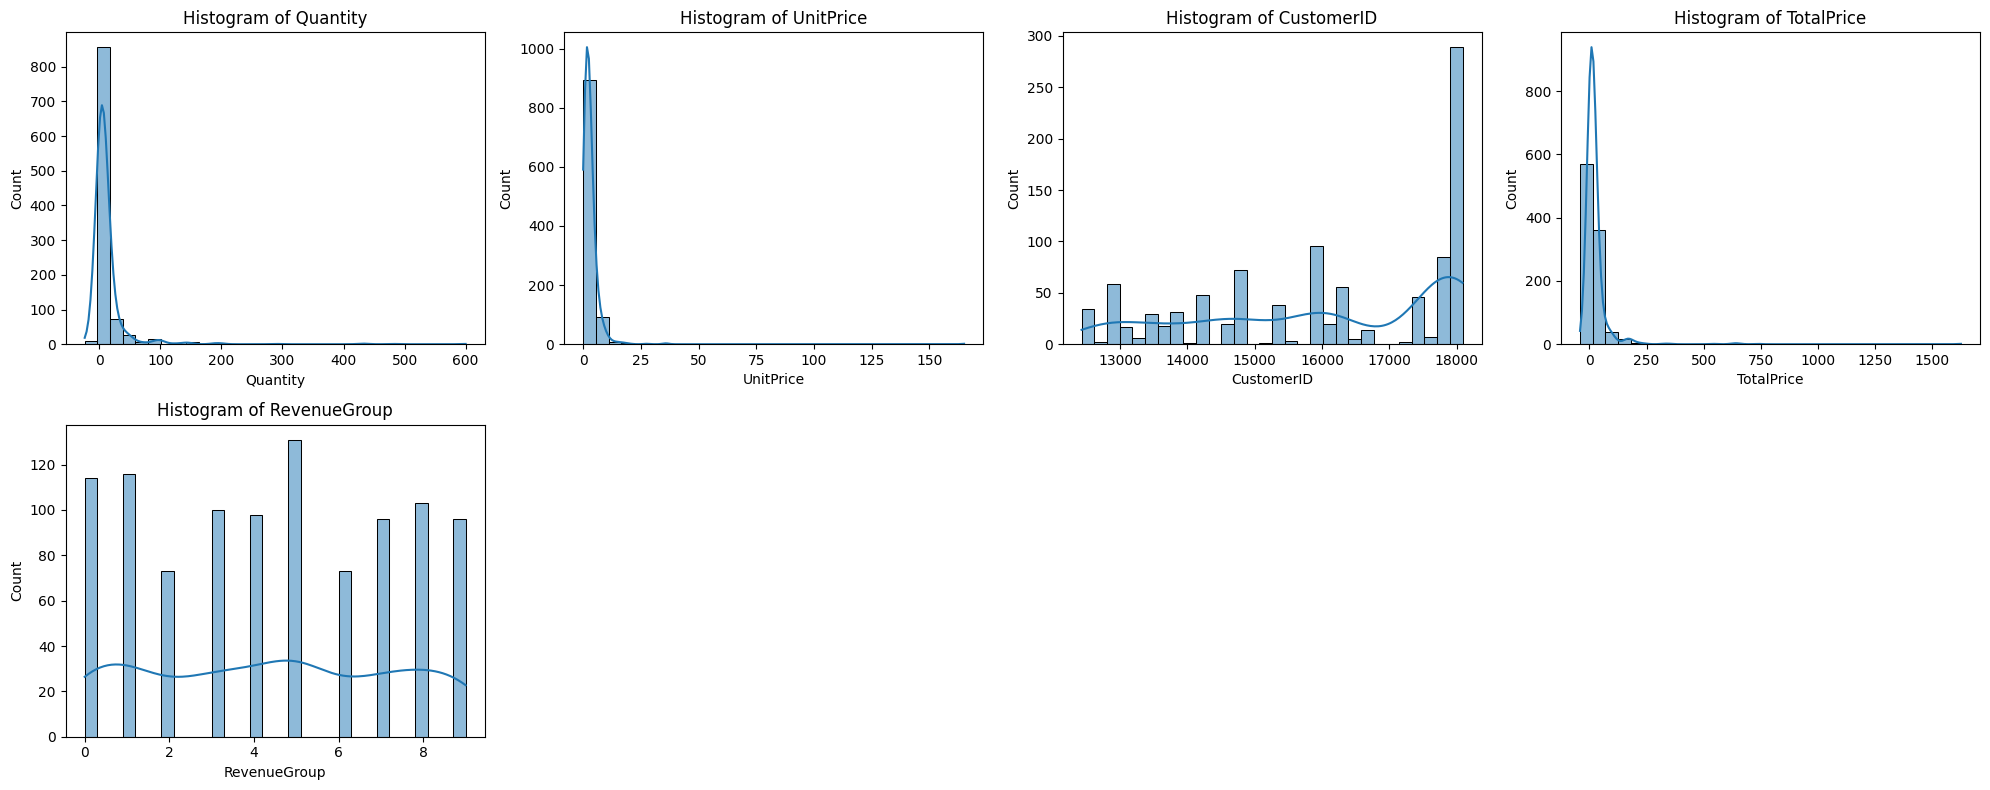

In [20]:
cols = df_sample.select_dtypes(include=['int64','float64']).columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4*n_rows))
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_sample[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

#### Boxplot

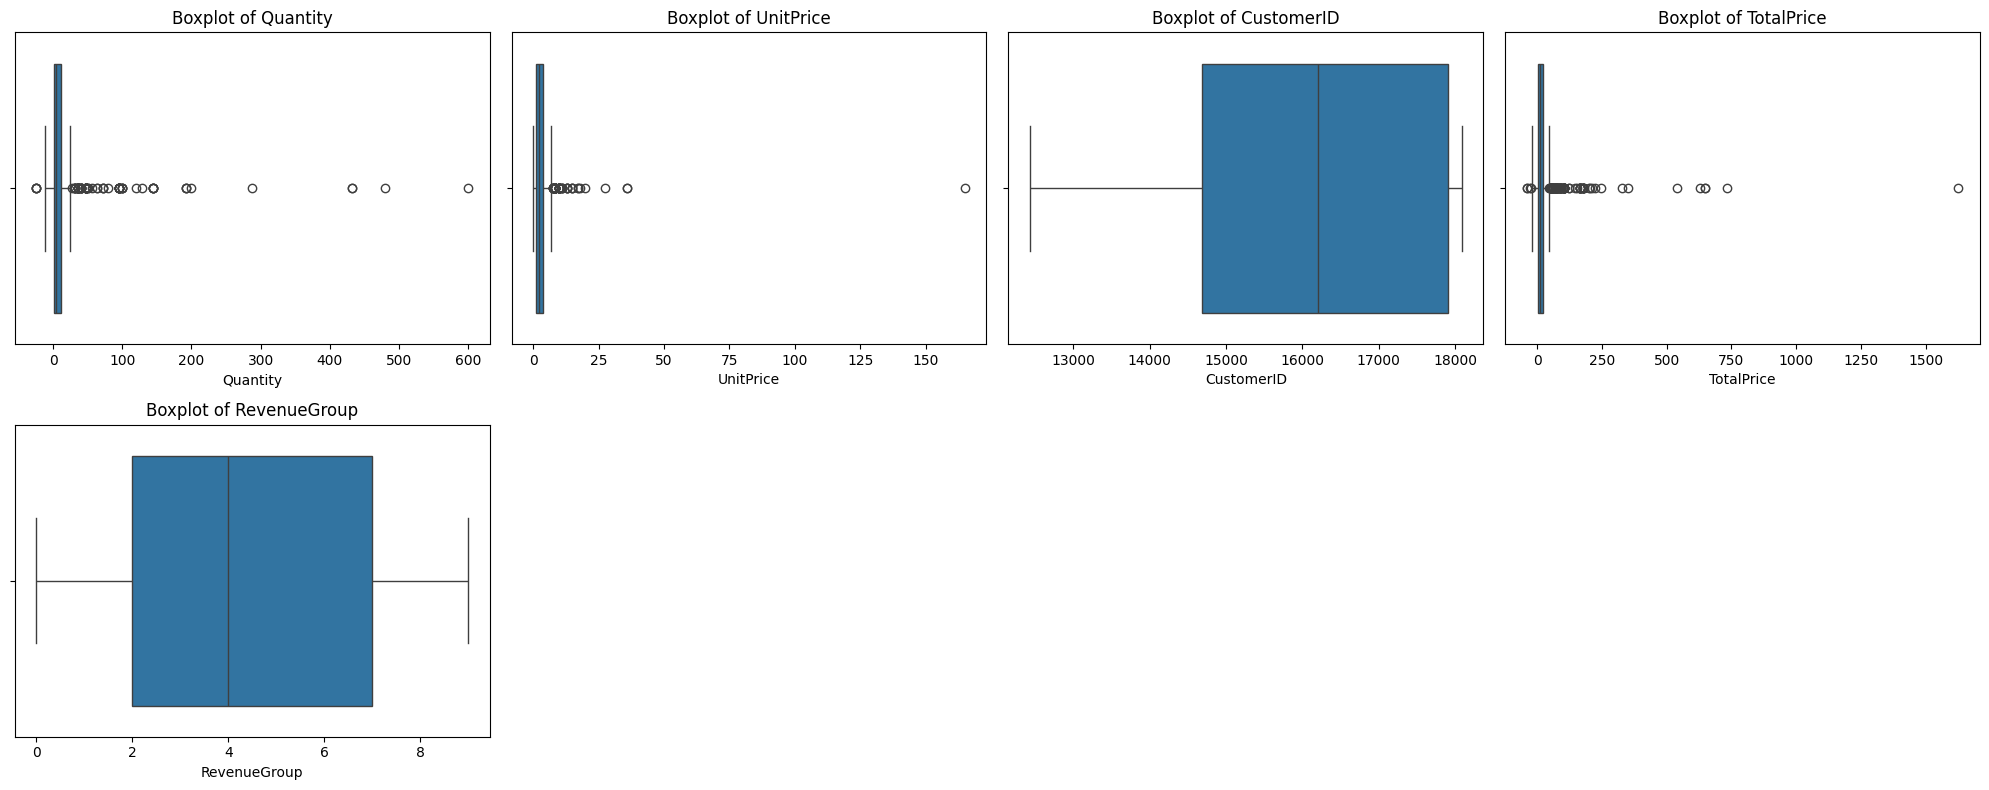

In [21]:
cols = df_sample.select_dtypes(include=['int64','float64']).columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4*n_rows))
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_sample[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#### Countplot

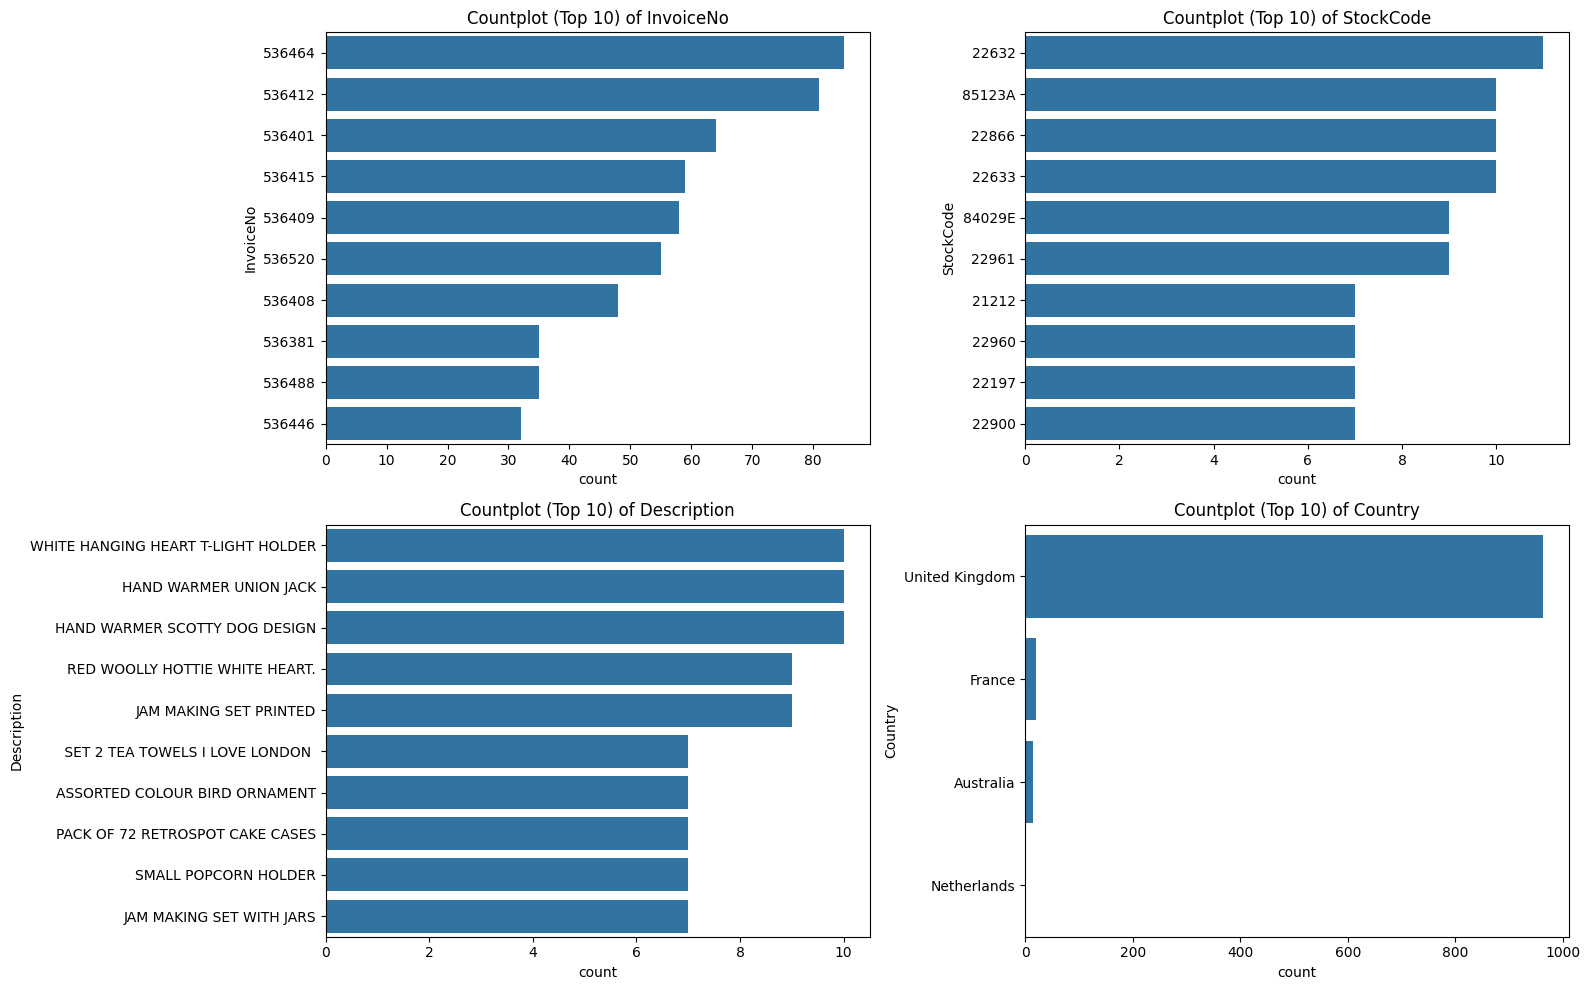

In [22]:
cols = df_sample.select_dtypes(include=['object']).columns
n = len(cols)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(16, 5*n_rows))
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    top_vals = df_sample[col].value_counts().nlargest(10).index
    sns.countplot(y=col, data=df_sample[df_sample[col].isin(top_vals)], order=top_vals)
    plt.title(f"Countplot (Top 10) of {col}")
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Correlation Heatmap

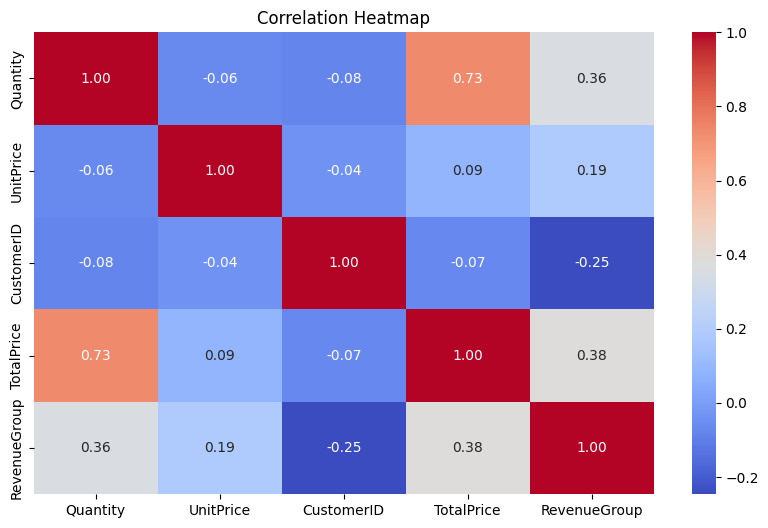

In [23]:
numeric_df = df_sample.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Scatter plots

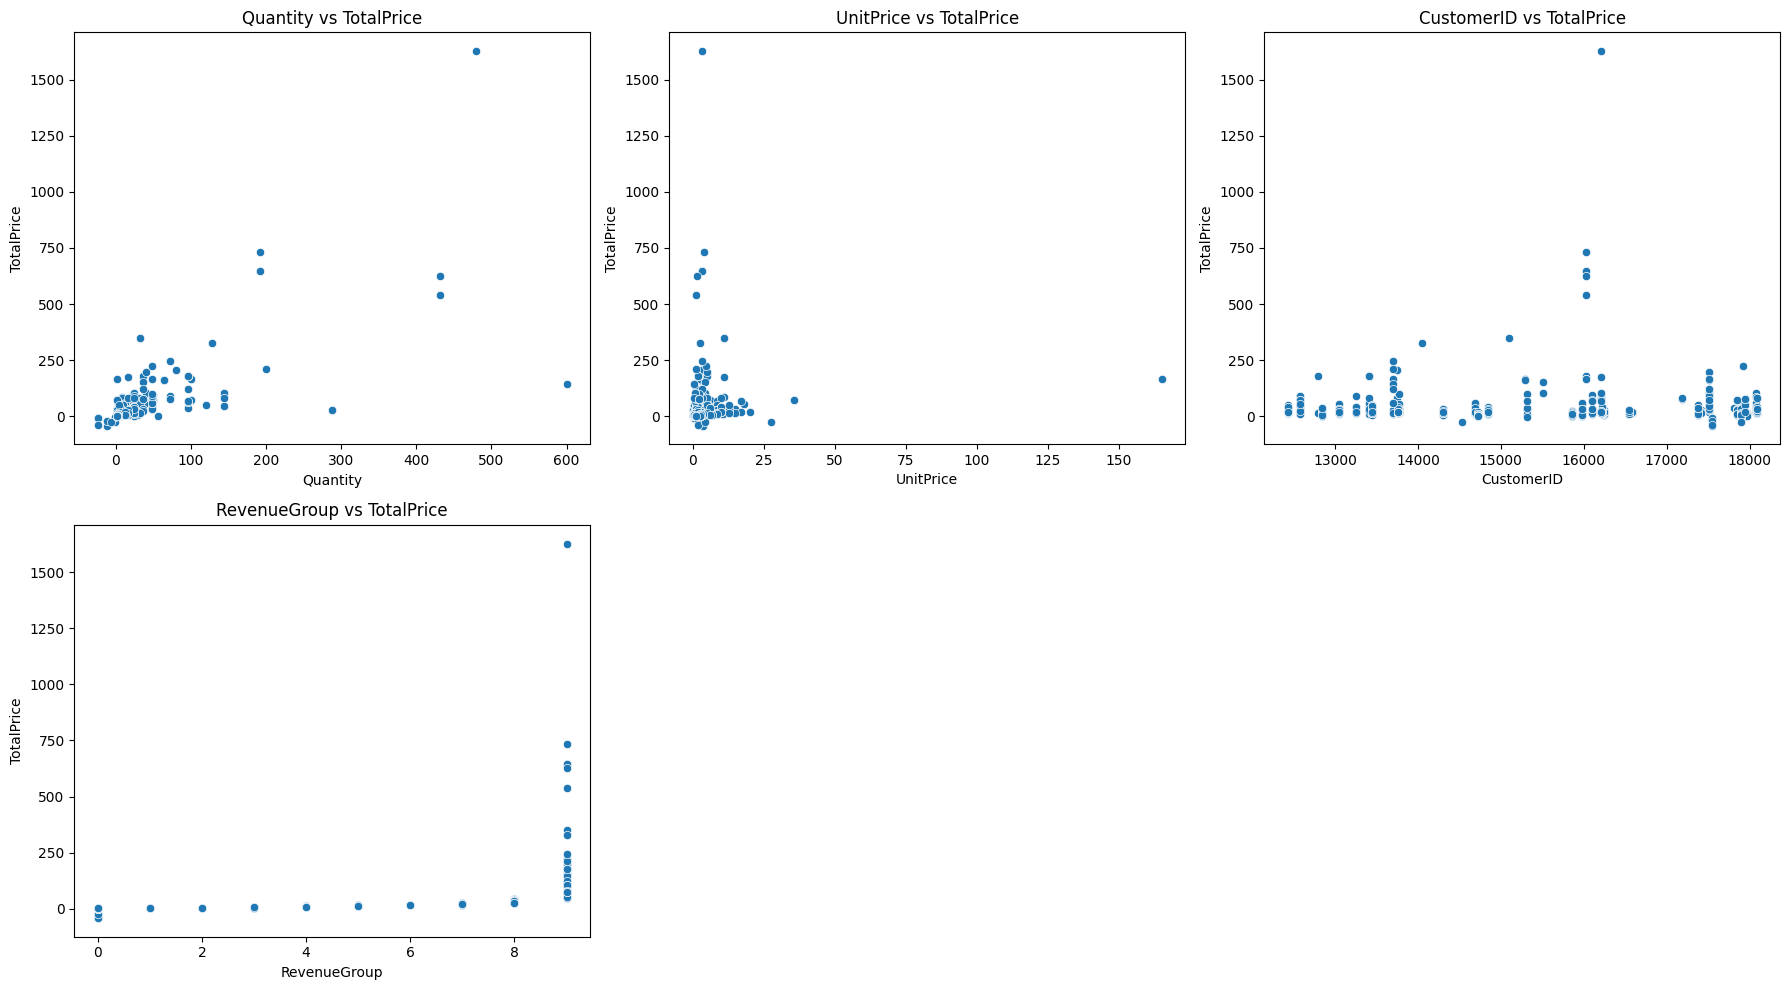

In [24]:
numeric_cols = df_sample.select_dtypes(include=['int64','float64']).columns.drop('TotalPrice')

n = len(numeric_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=df_sample[col], y=df_sample['TotalPrice'])
    plt.title(f"{col} vs TotalPrice")
plt.tight_layout()
plt.show()

#### Boxplot

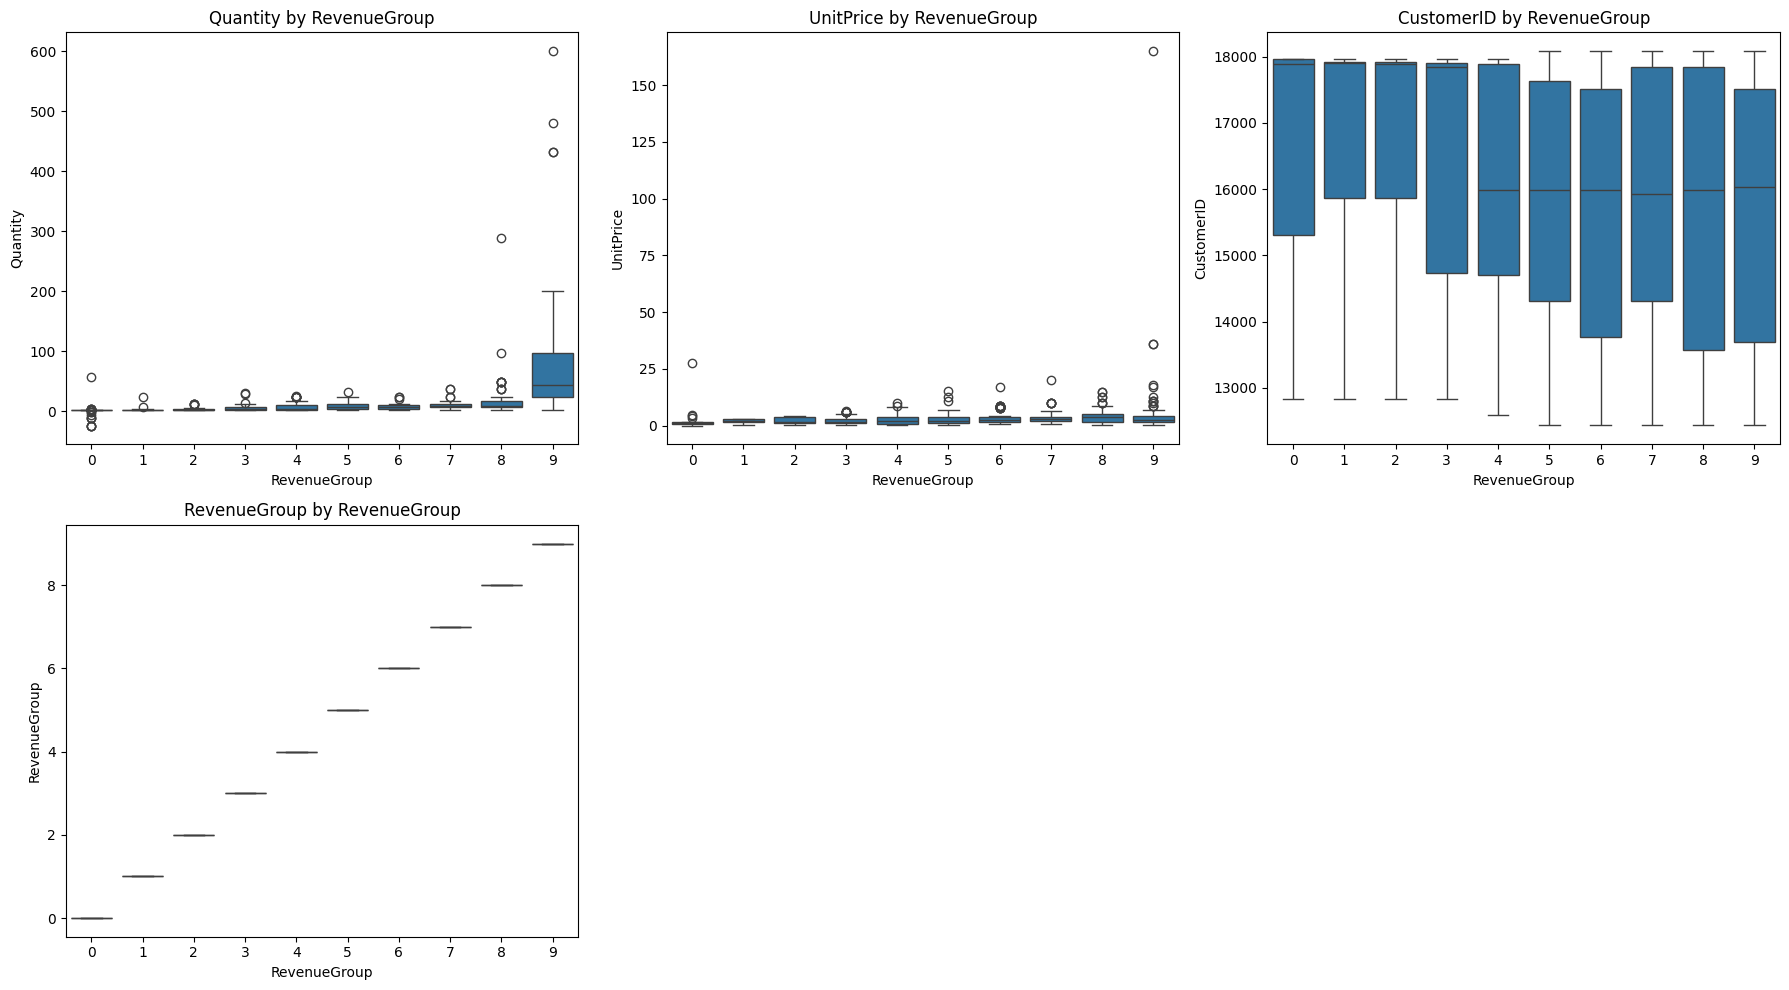

In [25]:
numeric_cols = df_sample.select_dtypes(include=['int64','float64']).columns.drop('TotalPrice')

n = len(numeric_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_sample['RevenueGroup'], y=df_sample[col])
    plt.title(f"{col} by RevenueGroup")
plt.tight_layout()
plt.show()

#### Barplot

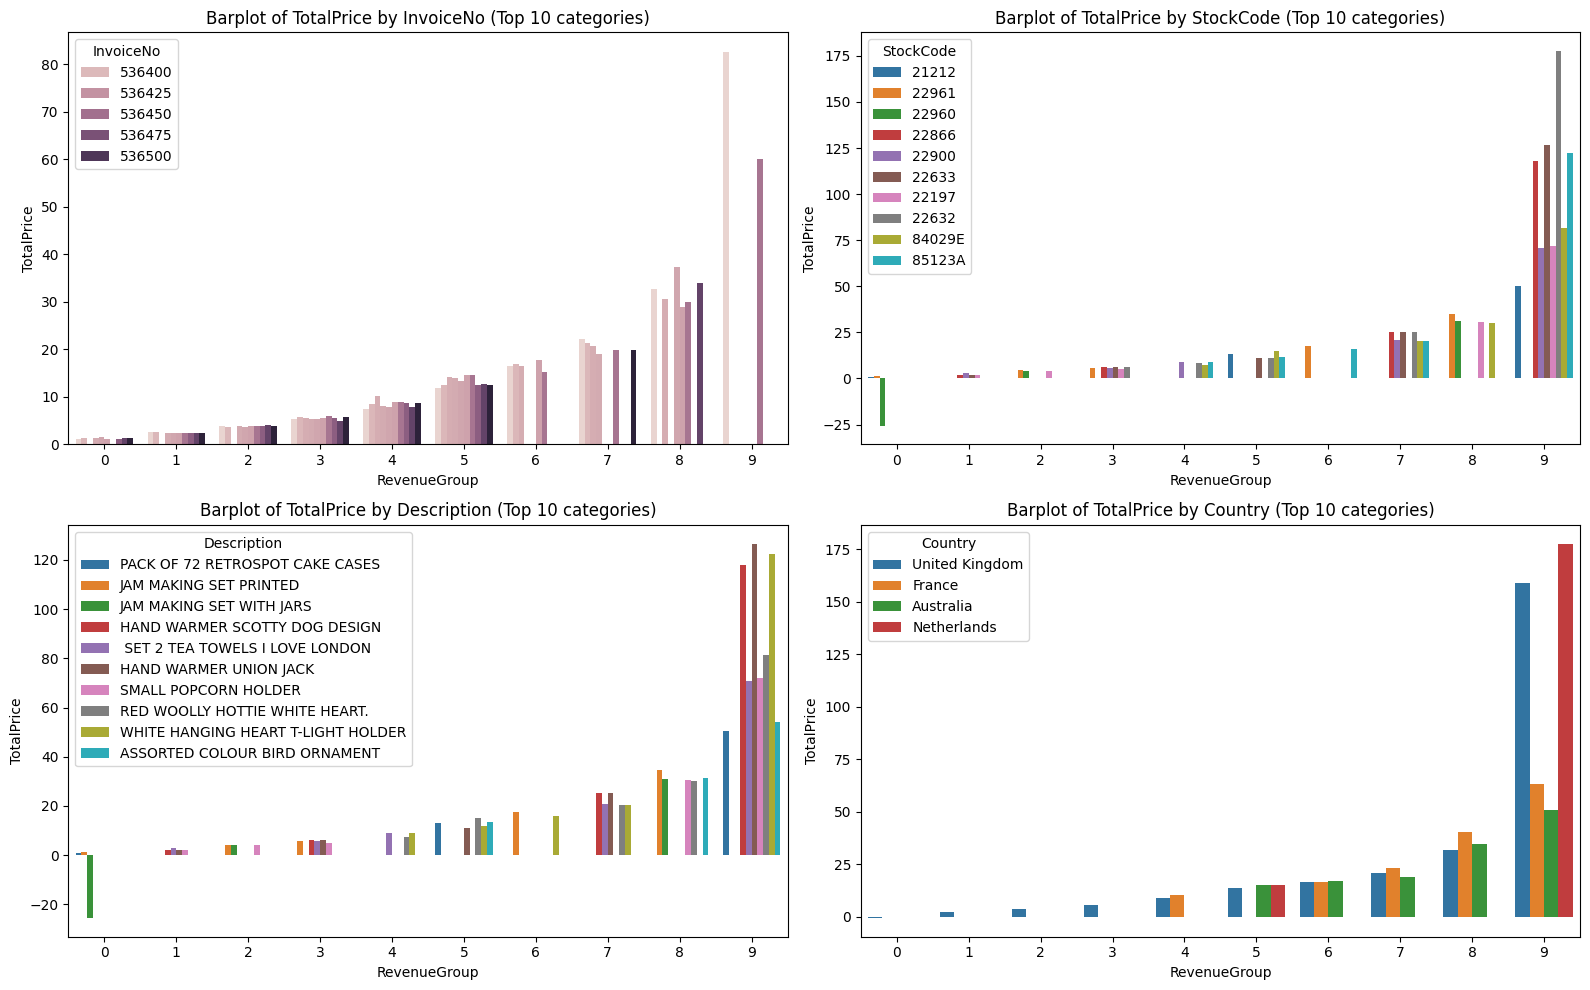

In [ ]:
cat_cols = df_sample.select_dtypes(include=['object']).columns

n = len(cat_cols)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(16, 5*n_rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    top_vals = df_sample[col].value_counts().nlargest(10).index
    sns.barplot(x="RevenueGroup", y="TotalPrice", hue=col, 
                data=df_sample[df_sample[col].isin(top_vals)], errorbar=None)
    plt.title(f"Barplot of TotalPrice by {col} (Top 10 categories)")
plt.tight_layout()
plt.show()

# The end